In [1]:
# Mount Google Drive (required if running on Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Install required modules
# !pip install '/content/drive/Team Drives/Deep Learning Team Drive/yelp_dataset_challenge-master/yelp_util'
!pip install Cython
# !pip install word2vec
!pip install gensim
!pip install unidecode
!pip install textblob
!pip install wordcloud


# Import required modules
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# import yelp_util
# from yelp_util import downloader as dl
import os
from scipy import misc
import numpy as np
import tensorflow as tf
from gensim.models import Word2Vec
import pandas as pd
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

    100% |████████████████████████████████| 2.1MB 1.9MB/s 
    100% |████████████████████████████████| 23.6MB 1.5MB/s 
    100% |████████████████████████████████| 1.4MB 15.2MB/s 
    100% |████████████████████████████████| 133kB 26.9MB/s 
    100% |████████████████████████████████| 5.1MB 7.0MB/s 
    100% |████████████████████████████████| 61kB 24.1MB/s 
    100% |████████████████████████████████| 552kB 21.2MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
    100% |████████████████████████████████| 245kB 7.5MB/s 
    100% |████████████████████████████████| 645kB 19.5MB/s 
    100% |████████████████████████████████| 368kB 25.2MB/s 
[nltk_data] Downloading package punkt

In [0]:
# Download and unpickle data
download_path =  '/content/drive/Team Drives/Deep Learning Team Drive/data'
review = pd.read_pickle(os.path.join(download_path, 'chinese_reviews.pickle'))
#review = review.loc[:, ['stars','text']] #use only stars & text columns

In [0]:
#PREOPROCESS A LITTLE BIT

review2 = review.loc[:, ['stars','text']]
#review2.head()
review3 = review.loc[:, ['stars','text']]


In [18]:
#Option 1: review2 makes stars > 3 = positive, and the rest negative

review2['sentiment']=['pos' if (x>3) else 'neg' for x in review2['stars']]
#review2.head()

#Option 2: review3 makes stars > 3 = positive, and stars = 2 or 1 negative. 3 are neutral/not considered for analysis.

#get rid of rows with 3 stars
review3 = review3[review3.stars != 3]
review3.stars.value_counts() # check that there are no "3" stars
review3['sentiment']=['pos' if (x>3) else 'neg' for x in review3['stars']] #add the sentiment column
review3.head()

,stars,text,sentiment
137,1,Take it from me; avoid this place at all cost....,neg
138,2,Far away from real Chinese food. Doesn't even ...,neg
139,2,I used to order takeout here once every month ...,neg
140,4,Delicious Singapore noodles and seafood deligh...,pos
142,1,All I can say is the worst! We were the only 2...,neg


In [19]:
#lowercase/remove punctuations

import re
#review2['text']= [x.lower() for x in review2['text']]
#review2['text'] = review2['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
#review2.head()

review3['text']= [x.lower() for x in review3['text']]
review3['text'] = review3['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
review3.head()

,stars,text,sentiment
137,1,take it from me avoid this place at all cost ...,neg
138,2,far away from real chinese food doesnt even ta...,neg
139,2,i used to order takeout here once every month ...,neg
140,4,delicious singapore noodles and seafood deligh...,pos
142,1,all i can say is the worst we were the only 2 ...,neg


In [0]:
#review2.dtypes
#review3.dtypes

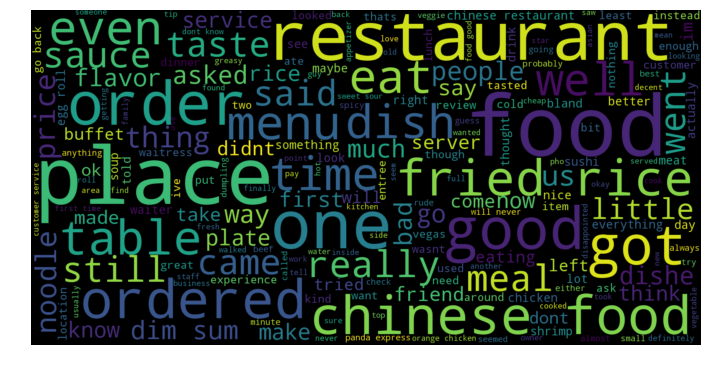

In [23]:
##Visualizations

## WordCloud for reviews with 1 or 2 stars ("negative" reviews) 
neg_review = review3[(review3['stars']==1) | (review3['stars']==2)]
neg_string = []
for t in neg_review.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

#negative reviews WordCloud (1,2 stars)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

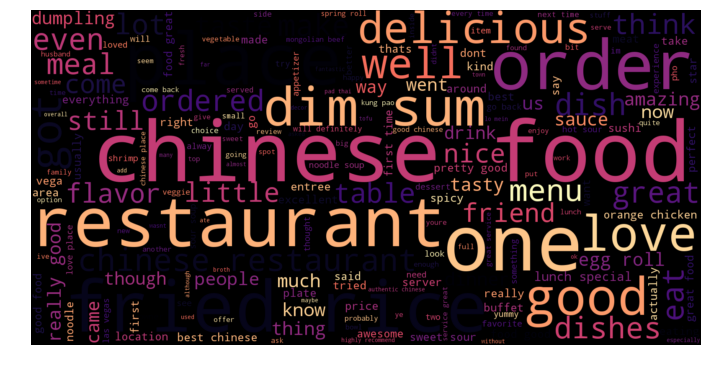

In [24]:
pos_review = review3[(review3['stars']==4) | (review3['stars']==5)]
pos_string = []
for t in pos_review.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

#Positive reviews WordCloud (4,5 stars)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
#################
#### L S T M ####
##### starts ####
##### here ###### 
#################

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, CuDNNLSTM, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

tokenizer = Tokenizer(num_words=2000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',                                  
                      lower=True,split=' ')
#tokenizer.fit_on_texts(review2['text'].values)
tokenizer.fit_on_texts(review3['text'].values)

In [82]:
#Use Tokenizer to vectorize the text and convert it into sequence of integers 
tokenizer

In [0]:
#X = tokenizer.texts_to_sequences(review2['text'].values)
X = tokenizer.texts_to_sequences(review3['text'].values)
X = pad_sequences(X)

In [84]:
#len(review2) #output: 51984
len(review3) #output: 43017

43017

In [85]:
### The following sections ###
### were exectued with the following hyper parameters ###
#embed_dim = 128
#lstm_out = 200
#batch_size = 32
#dropout layer
#vocabulary size = 2000

#activation function - softmax
#optimized = sgd

embed_dim = 128
lstm_out = 200
batch_size = 32

model = Sequential()
model.add(Embedding(2000, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='sgd',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 870, 128)          256000    
_________________________________________________________________
spatial_dropout1d_13 (Spatia (None, 870, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               263200    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 402       
Total params: 519,602
Trainable params: 519,602
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
#Y = pd.get_dummies(review2['sentiment']).values
Y = pd.get_dummies(review3['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(38715, 864) (38715, 2)
(4302, 864) (4302, 2)


In [31]:
#run with "review3" - option 2 with SGD optimized
#takes about 55 minutes to run each epoch...
model.fit(X_train, Y_train, batch_size = batch_size, epochs = 1, verbose = 2)

Epoch 1/1
 - 3049s - loss: 0.5954 - acc: 0.7206


In [32]:
#score: evaluation of the loss function
#loss/accuracy
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("Score: %.2f" % (score))
print("Validation Accuracy: %.2f" % (acc))

Score: 0.60
Validation Accuracy: 0.71


In [0]:
#run with "review3" - option 2 with Adams optimizer accuracy is higher! than option 1
model.fit(X_train, Y_train, batch_size = batch_size, epochs = 1, verbose = 2)

Epoch 1/1
 - 2667s - loss: 0.2984 - acc: 0.8791


In [0]:
#score: evaluation of the loss function
#loss/accuracyscore,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("Score: %.2f" % (score))
print("Validation Accuracy: %.2f" % (acc))

Score: 0.24
Validation Accuracy: 0.90


In [86]:
### The following sections ###
### were exectued with the following hyper parameters ###
#embed_dim = 128
#lstm_out = 200
#batch_size = 32
#dropout layer
#vocabulary size = 2000

#activation function - softmax
#optimized = adam
#uses CuDNNLSTM !!!!! (GPU powered)


embed_dim = 128
lstm_out = 200
batch_size = 32

model = Sequential()
model.add(Embedding(2000, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(CuDNNLSTM(lstm_out, return_sequences=False, input_shape=(864, 128)))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 870, 128)          256000    
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 870, 128)          0         
_________________________________________________________________
cu_dnnlstm_10 (CuDNNLSTM)    (None, 200)               264000    
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 402       
Total params: 520,402
Trainable params: 520,402
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#try review2
#Y = pd.get_dummies(review2['sentiment']).values
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
#print(X_train.shape,Y_train.shape)
#print(X_test.shape,Y_test.shape)

In [88]:
#Y = pd.get_dummies(review2['sentiment']).values
Y = pd.get_dummies(review3['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(38715, 870) (38715, 2)
(4302, 870) (4302, 2)


In [89]:
#run with "review3" - option 2 with ADAM optimizer
#sooooooooo much faster!!!
model.fit(X_train, Y_train, batch_size = batch_size, epochs = 3, verbose = 2)

Epoch 1/3
 - 206s - loss: 0.2727 - acc: 0.8902
Epoch 2/3
 - 203s - loss: 0.1855 - acc: 0.9308
Epoch 3/3
 - 204s - loss: 0.1357 - acc: 0.9494


In [90]:
#score: evaluation of the loss function
#loss/accuracy
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("Score: %.2f" % (score))
print("Validation Accuracy: %.2f" % (acc))

Score: 0.17
Validation Accuracy: 0.94


In [92]:
#LET'S PLOT IT
history = model.fit(X, Y, validation_split=0.1, epochs=10, batch_size=batch_size, verbose=2)

Train on 38715 samples, validate on 4302 samples
Epoch 1/10
 - 211s - loss: 0.1202 - acc: 0.9555 - val_loss: 0.1014 - val_acc: 0.9647
Epoch 2/10
 - 211s - loss: 0.1106 - acc: 0.9583 - val_loss: 0.1298 - val_acc: 0.9537
Epoch 3/10
 - 210s - loss: 0.0869 - acc: 0.9677 - val_loss: 0.1127 - val_acc: 0.9584
Epoch 4/10
 - 211s - loss: 0.0746 - acc: 0.9720 - val_loss: 0.1145 - val_acc: 0.9603
Epoch 5/10
 - 211s - loss: 0.0656 - acc: 0.9765 - val_loss: 0.1263 - val_acc: 0.9593
Epoch 6/10
 - 211s - loss: 0.0553 - acc: 0.9787 - val_loss: 0.1593 - val_acc: 0.9537
Epoch 7/10
 - 211s - loss: 0.0474 - acc: 0.9832 - val_loss: 0.1470 - val_acc: 0.9563
Epoch 8/10
 - 210s - loss: 0.0390 - acc: 0.9858 - val_loss: 0.1697 - val_acc: 0.9582
Epoch 9/10
 - 210s - loss: 0.0349 - acc: 0.9880 - val_loss: 0.1713 - val_acc: 0.9523
Epoch 10/10
 - 210s - loss: 0.0279 - acc: 0.9903 - val_loss: 0.1995 - val_acc: 0.9542


In [93]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


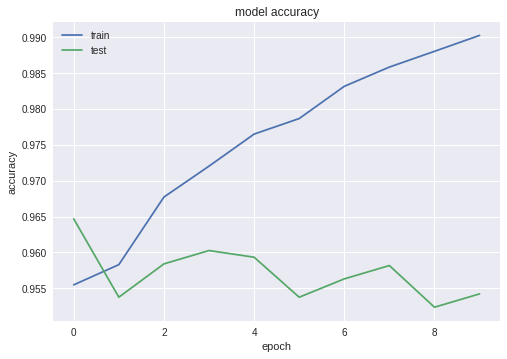

In [94]:
# plot accuracy over 10 epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

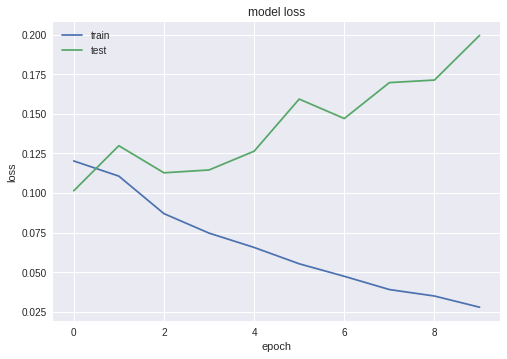

In [95]:
# plot loss over 10 epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
###################
## Bidirectional ##
##### L S T M #####
###### starts #####
####### here ######
###################

In [0]:
from keras.layers import Bidirectional, GlobalMaxPool1D,Conv1D

embed_dim = 128
lstm_out = 200
batch_size = 32

model = Sequential()
model.add(Embedding(2000, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(10, return_sequences=True),
                        input_shape=(5, 10)))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 873, 128)          256000    
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 873, 128)          0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 873, 20)           11120     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 20)                2480      
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 42        
Total params: 269,642
Trainable params: 269,642
Non-trainable params: 0
_________________________________________________________________
None
